In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/stock_price_data_Jan_1_2020_to_Oct_24_2023.csv')

In [3]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
                       Date Symbol    High     Low   Close      Volume
0  2023-10-24T00:00:00+0000   NVDA  436.97  426.91  436.63  40044400.0
1  2023-10-23T00:00:00+0000   NVDA  432.48  409.45  429.75  47721800.0
2  2023-10-20T00:00:00+0000   NVDA  424.70  410.78  413.87  47638100.0
3  2023-10-19T00:00:00+0000   NVDA  432.97  418.82  421.01  49937400.0
4  2023-10-18T00:00:00+0000   NVDA  432.19  418.25  421.96  62533900.0


In [4]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Date      0
Symbol    0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [13]:
# Print unique symbols
print("\nUnique Symbols:")
print(df['Symbol'].unique())


Unique Symbols:
['NVDA' 'TSLA' 'AMD' 'AAPL']


In [5]:
print("Data types in the DataFrame:")
print(df.dtypes)

Data types in the DataFrame:
Date       object
Symbol     object
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract only the date part from the datetime
df['Date'] = df['Date'].dt.date

# Display the modified DataFrame
print(df)


            Date Symbol    High     Low   Close       Volume
0     2023-10-24   NVDA  436.97  426.91  436.63   40044400.0
1     2023-10-23   NVDA  432.48  409.45  429.75   47721800.0
2     2023-10-20   NVDA  424.70  410.78  413.87   47638100.0
3     2023-10-19   NVDA  432.97  418.82  421.01   49937400.0
4     2023-10-18   NVDA  432.19  418.25  421.96   62533900.0
...          ...    ...     ...     ...     ...          ...
2003  2022-10-31   AAPL  154.24  151.92  153.34   97848900.0
2004  2022-10-28   AAPL  157.50  147.82  155.74  164659100.0
2005  2022-10-27   AAPL  149.05  144.13  144.80  108284100.0
2006  2022-10-26   AAPL  151.99  148.04  149.35   88194300.0
2007  2022-10-25   AAPL  152.49  149.36  152.34   74373600.0

[2008 rows x 6 columns]


In [8]:
print("\nSummary statistics of the data:")
print(df.describe())


Summary statistics of the data:
              High          Low        Close        Volume
count  2008.000000  2008.000000  2008.000000  2.008000e+03
mean    195.953587   189.233032   192.754846  7.797586e+07
std     102.931791    99.551832   101.264016  4.295632e+07
min      61.770000    58.030000    58.600000  1.679340e+07
25%     124.088325   117.693750   121.627500  4.772139e+07
50%     174.300000   169.935000   172.785000  6.118341e+07
75%     237.608825   228.457575   232.865000  9.758520e+07
max     502.660000   489.580000   493.550000  3.065906e+08


In [25]:
tsla_data = df[df['Symbol'] == 'TSLA']

amd_data = df[df['Symbol'] == 'AMD']

nvda_data = df[df['Symbol'] == 'NVDA']

appl_data = df[df['Symbol'] == 'AAPL']

In [19]:
def perform_eda(data, symbol):
    print(f"\nPreview of data for {symbol}:")
    print(data.head())

    print(f"\nSummary statistics for {symbol}:")
    print(data.describe())

    plt.figure(figsize=(14, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(data=data, x='High', kde=True, bins=30)
    plt.title(f"Distribution of High Prices for {symbol}")

    plt.subplot(2, 2, 2)
    sns.histplot(data=data, x='Low', kde=True, bins=30)
    plt.title(f"Distribution of Low Prices for {symbol}")

    plt.subplot(2, 2, 3)
    sns.boxplot(data=data[['High', 'Low']])
    plt.title(f"Boxplot for High and Low Prices of {symbol}")

    plt.subplot(2, 2, 4)
    sns.lineplot(data=data, x='Date', y='Volume')
    plt.title(f"Volume Trend for {symbol}")

    plt.tight_layout()
    plt.show()

    corr_matrix = data[['High', 'Low', 'Volume']].corr()
    plt.figure(figsize=(6, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation Matrix for {symbol}")
    plt.show()



Preview of data for TSLA:
           Date Symbol      High     Low   Close       Volume
251  2023-10-24   TSLA  222.0500  214.11  216.52  118231113.0
252  2023-10-23   TSLA  216.9800  202.51  212.08  150683368.0
253  2023-10-20   TSLA  218.8606  210.42  211.99  138010095.0
254  2023-10-19   TSLA  230.6100  216.78  220.11  170772713.0
255  2023-10-18   TSLA  254.6300  242.08  242.68  125147846.0

Summary statistics for TSLA:
             High         Low       Close        Volume
count  502.000000  502.000000  502.000000  5.020000e+02
mean   211.374835  202.237272  206.938187  1.355719e+08
std     45.234595   44.549447   44.913093  4.059497e+07
min    111.750000  101.810000  108.100000  5.067274e+07
25%    182.380000  172.503100  178.187500  1.068610e+08
50%    203.000000  192.890000  197.580000  1.282597e+08
75%    255.235000  244.472500  250.217500  1.616041e+08
max    299.290000  289.520100  293.340000  3.065906e+08


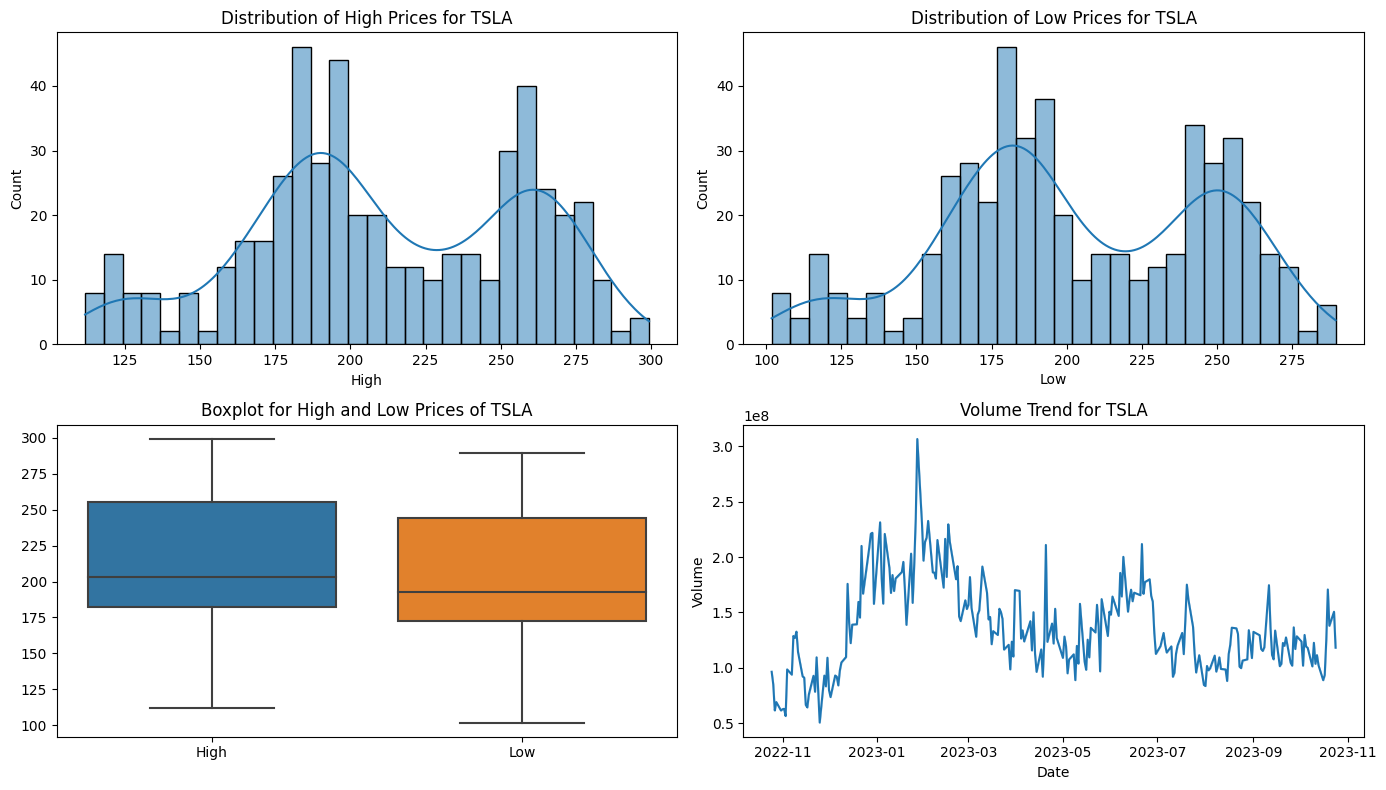

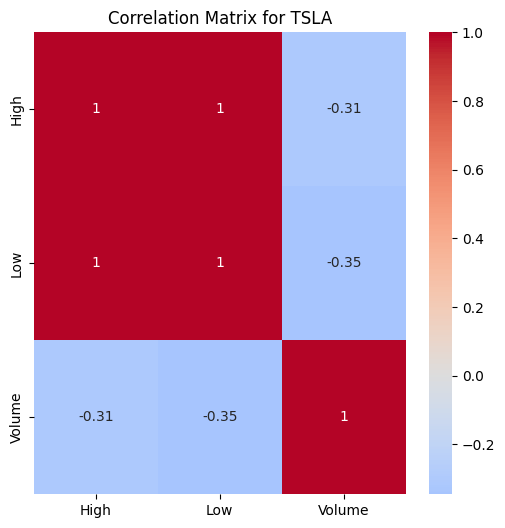

In [21]:
# Perform EDA for each symbol
perform_eda(tsla_data, 'TSLA')



Preview of data for AMD:
           Date Symbol      High      Low   Close      Volume
502  2023-10-24    AMD  101.7899   99.380  101.67  51982918.0
503  2023-10-23    AMD  102.4200   99.315  100.01  50817440.0
504  2023-10-20    AMD  104.3400  101.440  101.81  61317927.0
505  2023-10-19    AMD  105.6000  101.840  102.40  52734201.0
506  2023-10-18    AMD  104.7800  101.740  102.17  50449952.0

Summary statistics for AMD:
             High         Low       Close        Volume
count  502.000000  502.000000  502.000000  5.020000e+02
mean    94.617491   90.964844   92.833745  6.344530e+07
std     18.745036   18.119629   18.367280  2.105446e+07
min     61.770000   58.030000   58.600000  2.601891e+07
25%     77.234850   74.397375   76.377500  4.906602e+07
50%     96.940000   93.640000   95.960000  5.742182e+07
75%    110.095000  106.280300  108.195000  7.319219e+07
max    132.830000  126.400000  129.190000  1.733720e+08


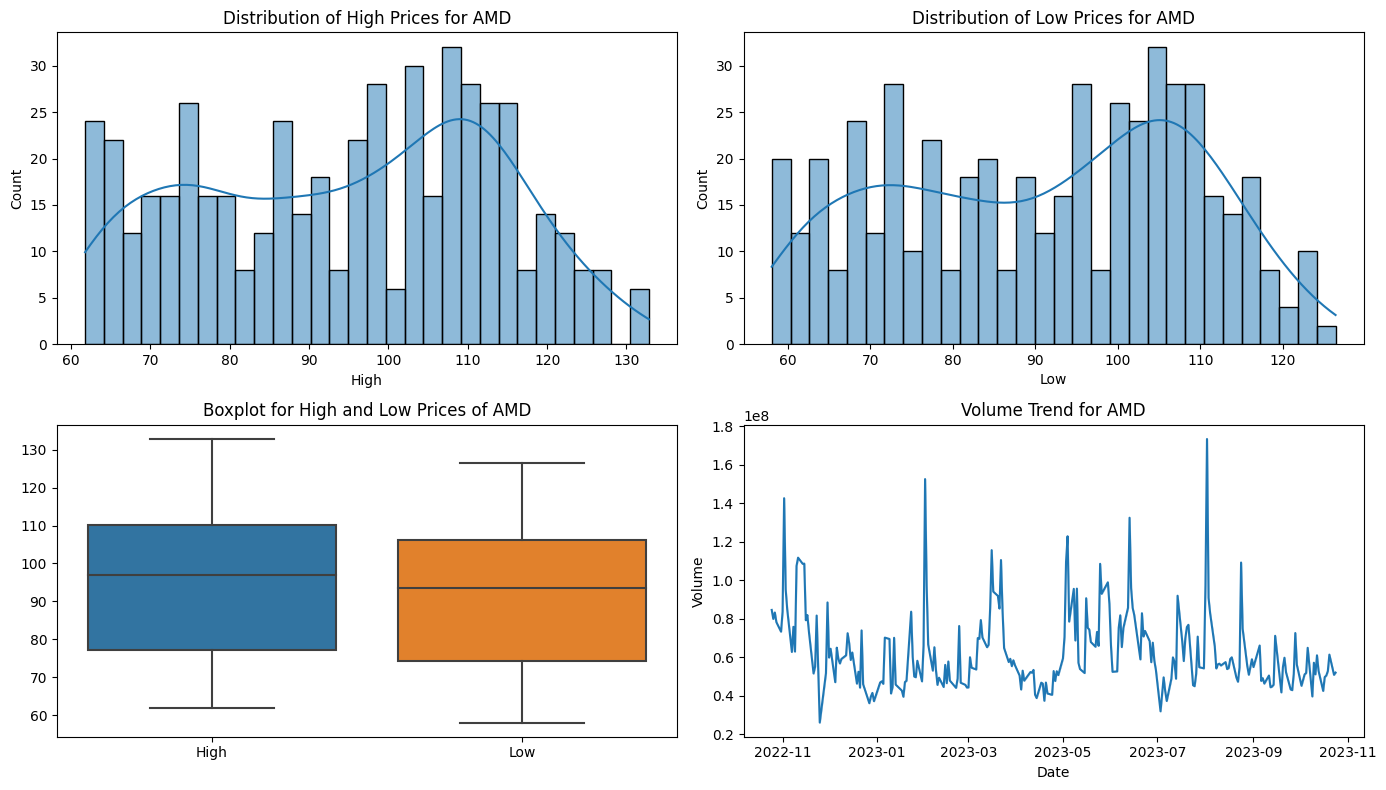

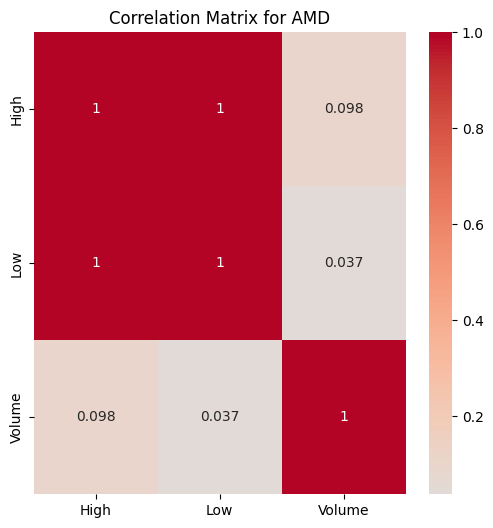

In [22]:
perform_eda(amd_data, 'AMD')


Preview of data for NVDA:
         Date Symbol    High     Low   Close      Volume
0  2023-10-24   NVDA  436.97  426.91  436.63  40044400.0
1  2023-10-23   NVDA  432.48  409.45  429.75  47721800.0
2  2023-10-20   NVDA  424.70  410.78  413.87  47638100.0
3  2023-10-19   NVDA  432.97  418.82  421.01  49937400.0
4  2023-10-18   NVDA  432.19  418.25  421.96  62533900.0

Summary statistics for NVDA:
             High         Low       Close        Volume
count  502.000000  502.000000  502.000000  5.020000e+02
mean   312.092855  301.206608  307.048127  4.839156e+07
std    121.429926  117.931349  119.430268  1.596389e+07
min    133.000000  126.640000  128.960000  1.679340e+07
25%    195.430000  188.525000  192.795000  3.821012e+07
50%    280.000000  272.400000  277.490000  4.537750e+07
75%    436.765000  421.717500  430.400000  5.351482e+07
max    502.660000  489.580000  493.550000  1.543911e+08


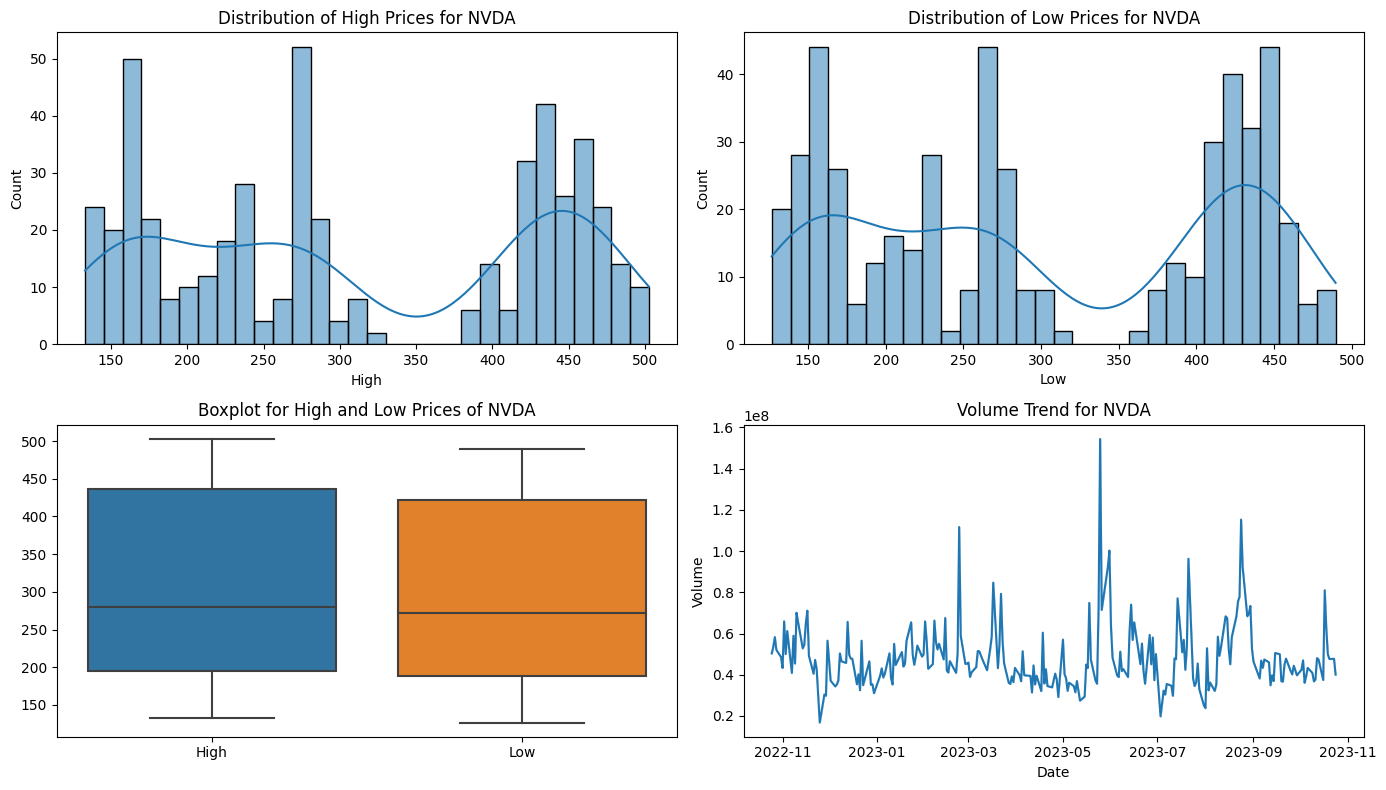

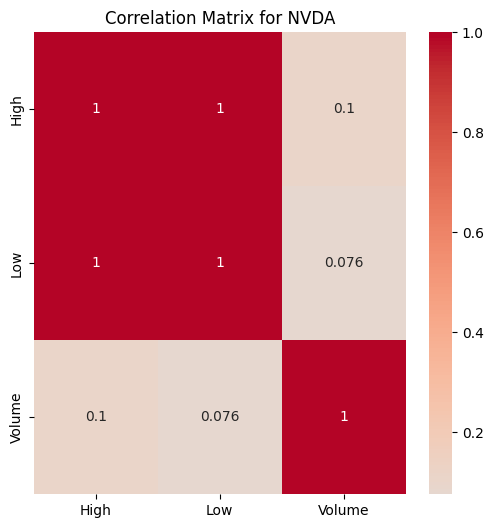

In [23]:
perform_eda(nvda_data, 'NVDA')


Preview of data for AAPL:
           Date Symbol    High     Low   Close      Volume
753  2023-10-24   AAPL  173.67  171.46  173.44  42363324.0
754  2023-10-23   AAPL  174.01  169.94  173.00  55856506.0
755  2023-10-20   AAPL  175.42  172.64  172.88  64189300.0
756  2023-10-19   AAPL  177.84  175.19  175.46  55176703.0
757  2023-10-18   AAPL  177.57  175.11  175.84  54587851.0

Summary statistics for AAPL:
             High         Low       Close        Volume
count  502.000000  502.000000  502.000000  5.020000e+02
mean   165.729167  162.523404  164.199323  6.449468e+07
std     18.496034   18.908761   18.683646  2.124570e+07
min    127.770000  124.170000  125.020000  3.145820e+07
25%    150.382500  147.252500  148.572500  4.983008e+07
50%    167.870000  165.540000  166.650000  5.879650e+07
75%    180.052500  177.110425  178.555000  7.356483e+07
max    198.220000  195.280000  196.450000  1.646591e+08


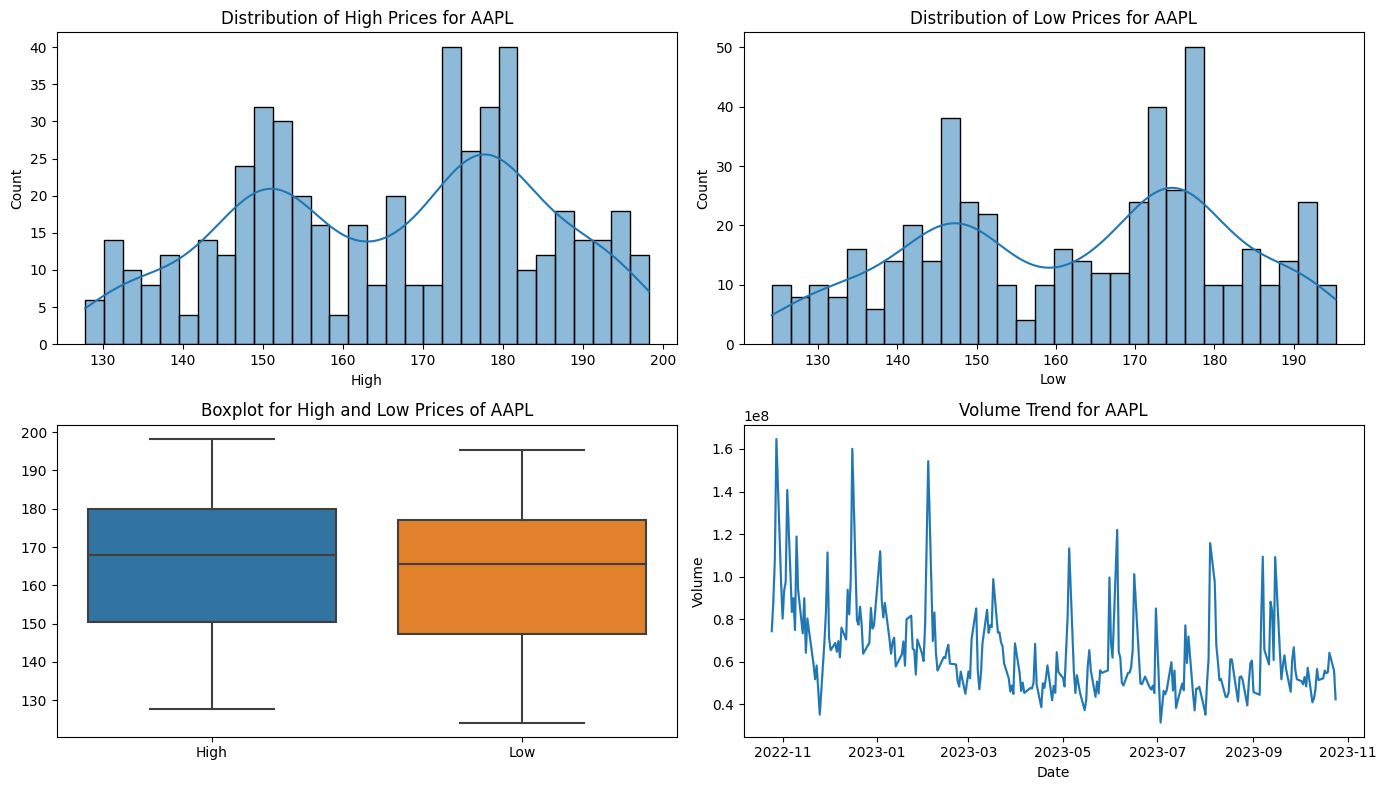

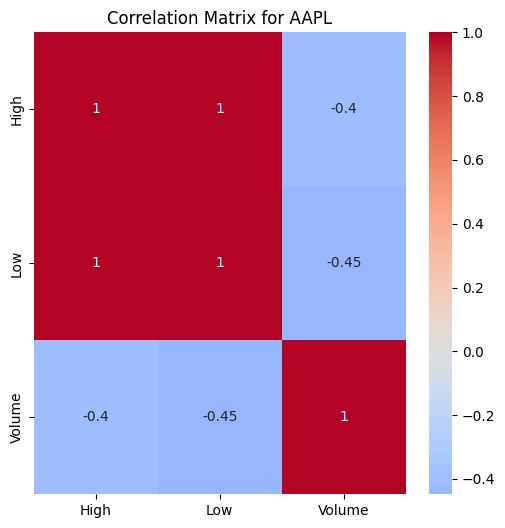

In [26]:
perform_eda(appl_data, 'AAPL')

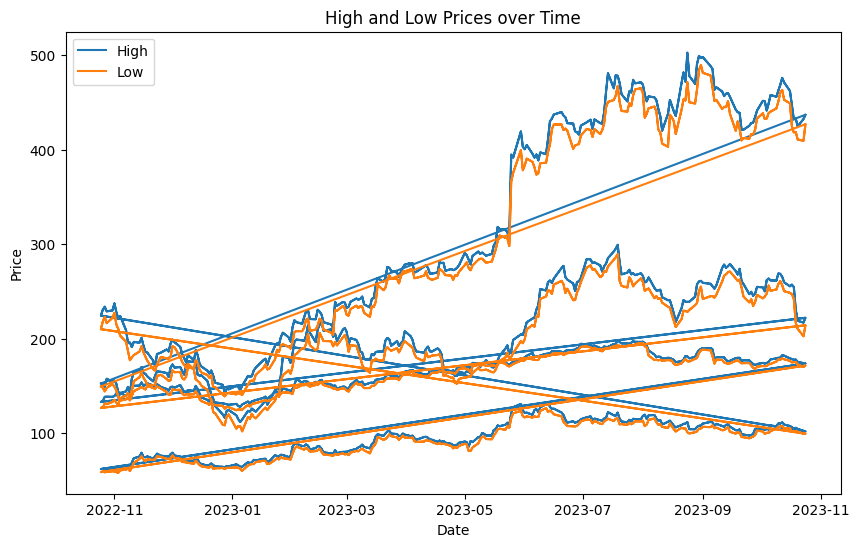

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices over Time')
plt.legend()
plt.show()

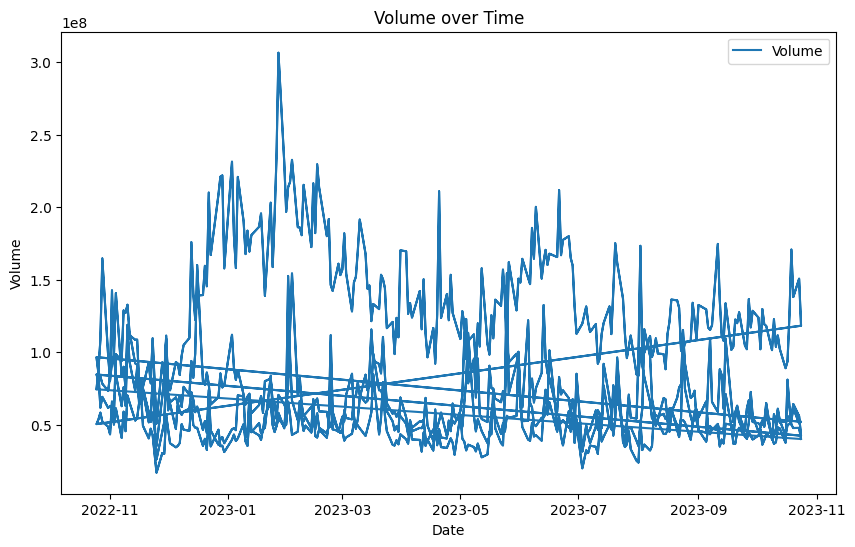

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over Time')
plt.legend()

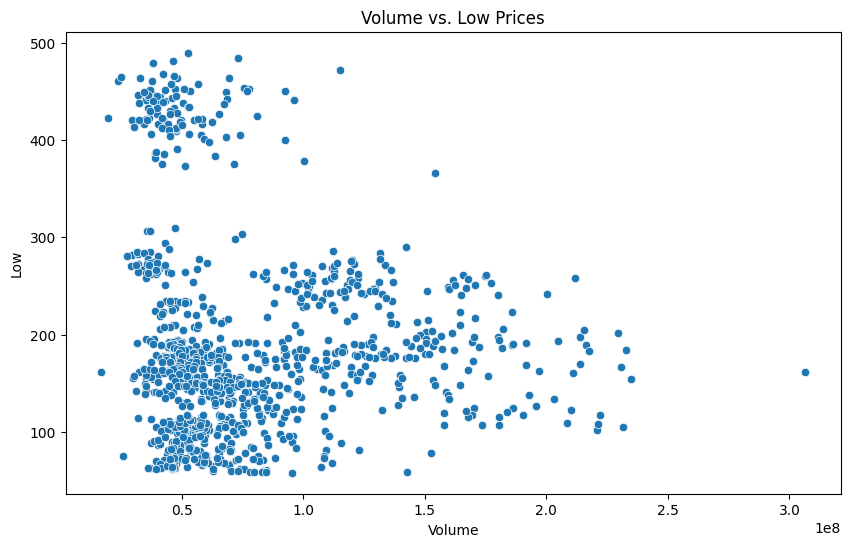

In [29]:
# Scatter plot of 'Volume' versus 'Low'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Volume', y='Low')
plt.title('Volume vs. Low Prices')
plt.show()